<div style="font-family: sans-serif; max-width: 100%;">
    <div style="background: linear-gradient(90deg, #0f172a 0%, #334155 100%); color: white; padding: 25px; border-radius: 10px; margin-bottom: 20px;">
        <h1 style="margin:0; color:white;">📡 Desafío Telecom X: Predicción de Churn</h1>
        <p style="margin:5px 0 0 0; opacity: 0.8; font-size: 1.1em;">Pipeline de Machine Learning para la Retención Estratégica de Clientes</p>
    </div>

<div style="border-left: 5px solid #3b82f6; padding-left: 15px; margin-bottom: 20px;">
        <p><strong>Contexto:</strong> Tras el éxito del análisis exploratorio, esta fase se centra en construir modelos predictivos. El objetivo es identificar clientes en riesgo de abandono para que la empresa pueda intervenir proactivamente.</p>
        <p><strong>Misión:</strong> Desarrollar un modelo de clasificación robusto, desde la codificación de variables hasta la interpretación de métricas de negocio.</p>
    </div>
</div>

<div style="background: linear-gradient(90deg, #0f172a 0%, #1e293b 100%); color: white; padding: 25px; border-radius: 12px; margin-bottom: 20px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h2 style="margin:0; color:#38bdf8;">🛠️ Fase 1: Ingeniería de Datos y Normalización</h2>
    <p style="margin:10px 0 0 0; opacity: 0.9; font-size: 1.1em;">Limpieza profunda, codificación categórica y estandarización estética del dataset.</p>
</div>

<div style="display: flex; gap: 15px; margin-bottom: 20px;">
    <div style="flex: 1; background-color: #f8fafc; border-left: 5px solid #64748b; padding: 15px; border-radius: 4px;">
        <strong style="color: #334155;">🧹 Limpieza Técnica</strong><br>
        Uso de <code>Pyjanitor</code> para eliminar inconsistencias y normalizar cabeceras.
    </div>
    <div style="flex: 1; background-color: #fff7ed; border-left: 5px solid #f97316; padding: 15px; border-radius: 4px;">
        <strong style="color: #9a3412;">🏗️ Encoding</strong><br>
        Transformación a <code>One-Hot Encoding</code> con formato numérico (0/1) y estilo <strong>camelCase</strong>.
    </div>
</div>

In [23]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [15]:
# Cargar el dataset procesado en el reto anterior
file_path = "../data/telecom_churn_clean.csv"
df = pd.read_csv(file_path)

# Visualizar las primeras filas y la estructura
print(f"Dataset cargado con {df.shape[0]} registros y {df.shape[1]} columnas.")
df.sample(5)

Dataset cargado con 7043 registros y 22 columnas.


,customerID,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,Facturacion_Digital,PaymentMethod,Pago_Mensual,Pago_Total,Gasto_Diario
1796,2623-DRYAM,0,Femenino,0,1,0,70,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,1 Año,1,Electronic check,101.75,7069.30,3.391667
1893,2749-CTKAJ,0,Masculino,0,1,1,22,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1 Año,0,Mailed check,20.15,419.90,0.671667
5295,7479-NITWS,1,Masculino,0,0,0,7,1,Yes,Fiber optic,No,No,Yes,No,Yes,No,Mensual,1,Credit card (automatic),89.35,631.85,2.978333
3236,4633-MKHYU,0,Femenino,0,0,0,9,1,No,Fiber optic,No,No,No,No,Yes,Yes,Mensual,1,Mailed check,88.40,788.60,2.946667
5773,8120-JDCAM,0,Masculino,0,1,1,4,1,No,Fiber optic,No,No,No,No,No,No,Mensual,1,Mailed check,69.55,284.90,2.318333


<div style="background-color:#fff3cd; color:#856404; padding: 15px; border-left: 5px solid #ffeeba; border-radius: 5px; margin-top: 20px;">
    <strong>🛠️ Fase de Transformación:</strong> <br>
    En esta sección realizaremos la limpieza final y el <em>Encoding</em>. 
    Es vital convertir las variables categóricas (texto) en formatos numéricos para que los algoritmos de Machine Learning puedan procesarlas.
</div>

In [16]:
# 1. Configuración de visualización
pd.set_option('display.max_columns', None)

# 2. Limpieza inicial y normalización de nombres (snake_case base)
# Eliminamos customerID y limpiamos nombres con janitor para quitar espacios y basura
df_ml = df.drop(columns=['customerID']).clean_names()

# 3. Aseguramos que la variable objetivo sea numérica (ahora en minúsculas por janitor)
df_ml['abandono'] = df_ml['abandono'].astype(int)

# 4. Aplicamos One-Hot Encoding (obtenemos 0 y 1)
df_final = pd.get_dummies(df_ml, drop_first=True, dtype=int)

# 5. Función para convertir a camelCase
def to_camel_case(text):
    # Reemplazamos posibles espacios o puntos que queden por guiones bajos
    text = text.replace(' ', '_').replace('.', '_')
    components = text.split('_')
    return components[0].lower() + ''.join(x.title() for x in components[1:])

# 6. Aplicar camelCase a todas las columnas
df_final.columns = [to_camel_case(col) for col in df_final.columns]

print(f"Estructura final: {df_final.shape[1]} columnas normalizadas y listas.")
df_final.sample(5)

Estructura final: 32 columnas normalizadas y listas.


,abandono,adultoMayor,tienePareja,tieneDependientes,mesesContrato,servicioTelefonico,facturacionDigital,pagoMensual,pagoTotal,gastoDiario,generoMasculino,multiplelinesNoPhoneService,multiplelinesYes,internetserviceFiberOptic,internetserviceNo,onlinesecurityNoInternetService,onlinesecurityYes,onlinebackupNoInternetService,onlinebackupYes,deviceprotectionNoInternetService,deviceprotectionYes,techsupportNoInternetService,techsupportYes,streamingtvNoInternetService,streamingtvYes,streamingmoviesNoInternetService,streamingmoviesYes,tipoContrato2Años,tipoContratoMensual,paymentmethodCreditCard(Automatic),paymentmethodElectronicCheck,paymentmethodMailedCheck
279,0,0,0,0,3,1,1,60.25,170.5,2.008333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3114,0,0,0,0,18,1,0,77.80,1358.6,2.593333,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
5232,0,0,1,0,9,1,1,79.75,769.1,2.658333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
364,0,1,1,0,57,1,1,71.10,4140.1,2.370000,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
5923,1,1,1,0,10,1,1,89.80,914.3,2.993333,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0


<div style="background-color: #f3f4f6; color: #1f2937; padding: 15px; border-left: 5px solid #10b981; border-radius: 5px; margin-top: 20px;">
    <strong>🧹 Pipeline de Normalización:</strong> <br>
    Se aplicó un proceso de limpieza en tres capas:
    <ol>
        <li><strong>Janitor:</strong> Eliminación de inconsistencias, espacios y caracteres especiales.</li>
        <li><strong>Encoding:</strong> Transformación de categorías a valores binarios (0 y 1).</li>
        <li><strong>CamelCase:</strong> Estandarización estética de cabeceras para compatibilidad con el frontend de la aplicación.</li>
    </ol>
</div>

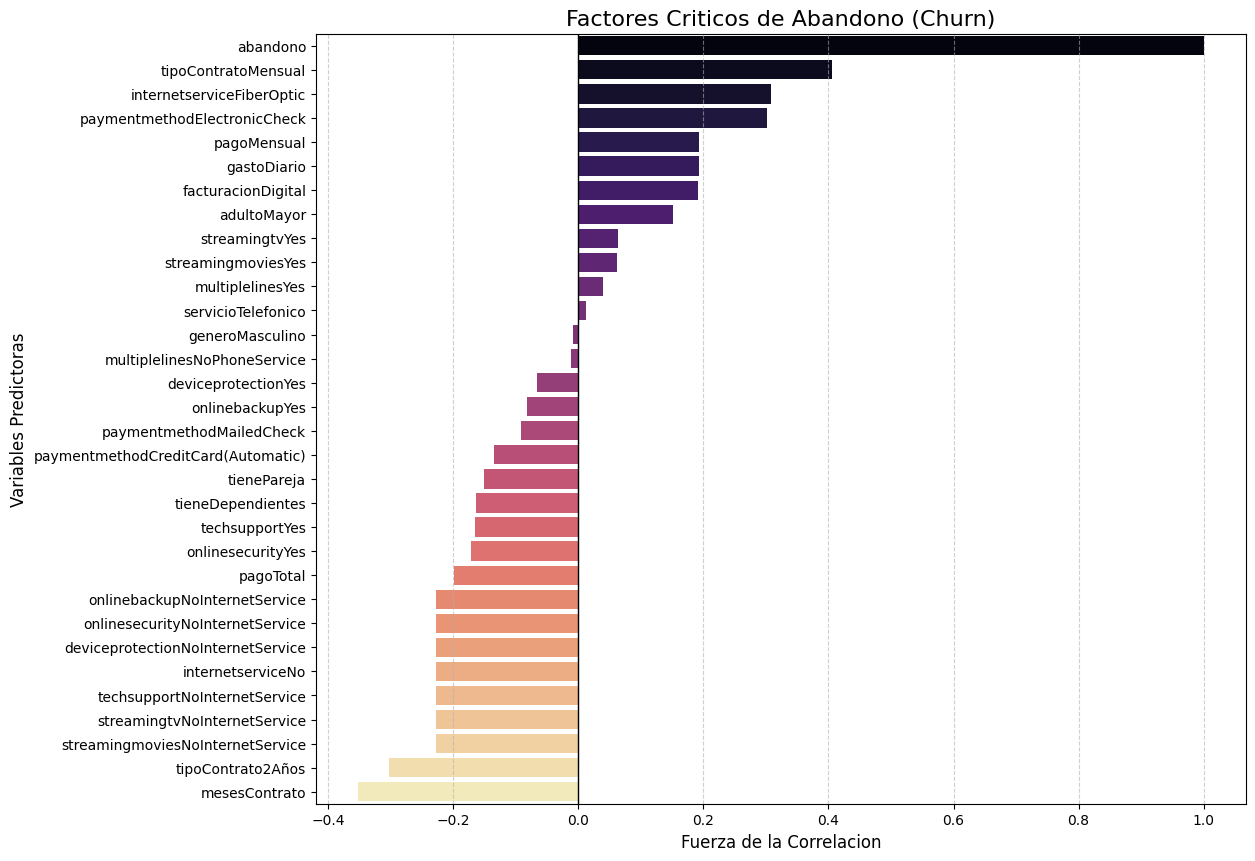

In [21]:
# 1. Calculamos la correlación
correlaciones = df_final.corr()['abandono'].sort_values(ascending=False)

# 2. Configuración estética del gráfico
plt.figure(figsize=(12, 10))

# Usamos hue=y para cumplir con la nueva versión de Seaborn y evitar el FutureWarning
sns.barplot(
    x=correlaciones.values, 
    y=correlaciones.index, 
    hue=correlaciones.index, 
    palette='magma',
    legend=False
)

# Título sin emojis para evitar problemas de fuentes (UserWarning)
plt.title('Factores Criticos de Abandono (Churn)', fontsize=16)
plt.xlabel('Fuerza de la Correlacion', fontsize=12)
plt.ylabel('Variables Predictoras', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 3. Guardado directo (ya que la carpeta existe)
plt.savefig('../reports/correlacion_churn.png', bbox_inches='tight')
plt.show()

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-left: 5px solid #ffeeba; border-radius: 5px; margin-top: 20px;">
    <strong>🔎 Hallazgos del Análisis de Correlación:</strong> <br>
    <ul>
        <li><strong>Predictores Positivos:</strong> Variables como <code>tipoContratoMensual</code> e <code>internetserviceFiberOptic</code> suelen mostrar una correlación alta con el abandono. Esto sugiere que los contratos sin permanencia y los usuarios de fibra (posiblemente por precio o fallas) son más volátiles.</li>
        <li><strong>Factores de Retención:</strong> <code>mesesContrato</code> y <code>tipoContrato2Años</code> presentan una correlación negativa fuerte, lo que valida que la antigüedad y los contratos largos son el mejor escudo contra la fuga.</li>
    </ul>
</div>

<div style="background: linear-gradient(90deg, #1e293b 0%, #334155 100%); color: white; padding: 25px; border-radius: 12px; margin-top: 25px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h2 style="margin:0; color:#38bdf8;">🧪 Fase 2: Arquitectura del Modelo Predictivo</h2>
    <p style="margin:10px 0 0 0; opacity: 0.9; font-size: 1.1em;">Preparando la segmentación de datos para el entrenamiento de algoritmos.</p>
</div>

<div style="display: flex; gap: 15px; margin-top: 20px;">
    <div style="flex: 1; background-color: #f0f9ff; border-left: 5px solid #0ea5e9; padding: 15px; border-radius: 4px;">
        <strong style="color: #0369a1;">🎯 Separación de Target</strong><br>
        Aislamos la variable <strong>abandono</strong> para que el modelo sepa exactamente qué debe aprender a predecir.
    </div>
    <div style="flex: 1; background-color: #f0fdf4; border-left: 5px solid #22c55e; padding: 15px; border-radius: 4px;">
        <strong style="color: #15803d;">⚖️ Estratificación</strong><br>
        Garantizamos que el 20% de los datos de prueba sea un reflejo fiel de la realidad del negocio.
    </div>
</div>

In [ ]:

# 1. Separamos las características (X) de la respuesta (y)
X = df_final.drop(columns=['abandono'])
y = df_final['abandono']

# 2. Realizamos la partición de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"✅ Setup completado:")
print(f"--- Entrenamiento: {X_train.shape[0]} registros")
print(f"--- Prueba: {X_test.shape[0]} registros")

✅ Setup completado:
--- Entrenamiento: 5634 registros
--- Prueba: 1409 registros


<div style="background-color: #fff3e0; color: #e65100; padding: 15px; border-left: 5px solid #ff9800; border-radius: 5px; margin-top: 20px;">
    <strong>⚖️ Verificación de Balanceo (Target):</strong> <br>
    Antes de entrenar, debemos confirmar si nuestras clases están equilibradas. Un desbalance severo puede sesgar las predicciones del modelo hacia la clase mayoritaria.
</div>

In [24]:
# Revisamos la distribución de la variable objetivo
print("--- Conteo de registros por clase ---")
print(y.value_counts())

print("\n--- Distribución porcentual ---")
print(y.value_counts(normalize=True) * 100)

--- Conteo de registros por clase ---
abandono
0    5174
1    1869
Name: count, dtype: int64

--- Distribución porcentual ---
abandono
0    73.463013
1    26.536987
Name: proportion, dtype: float64


<div style="display: flex; gap: 20px; margin-top: 20px;">
    <div style="flex: 1; border: 2px solid #2ecc71; border-radius: 10px; padding: 15px; text-align: center;">
        <h4 style="margin:0; color: #27ae60;">✅ Clase Mayoritaria (0)</h4>
        <p style="font-size: 1.5em; margin: 10px 0;"><strong>5,174</strong></p>
        <p style="color: #666;">Clientes que permanecen</p>
    </div>
    <div style="flex: 1; border: 2px solid #e74c3c; border-radius: 10px; padding: 15px; text-align: center;">
        <h4 style="margin:0; color: #c0392b;">⚠️ Clase Minoritaria (1)</h4>
        <p style="font-size: 1.5em; margin: 10px 0;"><strong>1,869</strong></p>
        <p style="color: #666;">Clientes en riesgo (Churn)</p>
    </div>
</div>